
# Section 12: Statistical Distributions


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-stat-distributions-use-cases-online-ds-ft-100719/master/images/dists.png" width=500>

- For online-ds-ft-070620 
- study group: 08/07/20

# Learning Objectives

- Learn about probability functions and their relation to distributions:
    - PMF / PDF / CDF
- Discuss the different types of distributions and their use cases
    - Use interactive mini-dashboards to visualize some distributions (binomial, normal)

- Practice turning math equations into functions

- Normal Distribution -> Standardized Normal Distribution

## Questions:


-


# Probability Functions: PMF vs PDF vs CDF

In [3]:
# !pip install -U fsds
from fsds.imports import *
plt.style.use('fivethirtyeight')
import coin_toss as ct
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Probability Mass Function


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Probability_Mass_Function_web.png">

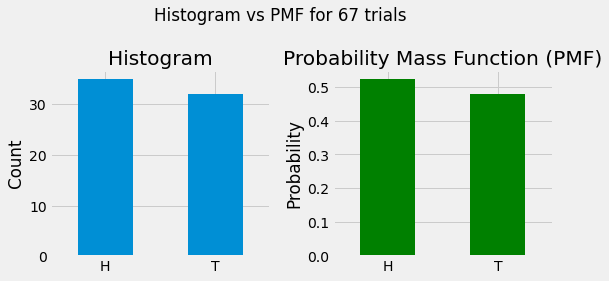

In [4]:
results = ct.coin_toss(67,verbose=False)
fig,ax = ct.compare_results(results)


- Converts counts to probability of a **discrete** function by normalizing so that the sum of all outcomes == 1.

- Can test what is the probability that $x$ takes on a particular value $k$
    - $P(X=k)$

> "If we have x outcomes, what is the probability of getting k (our value of interest) from x?"



In [5]:
df = fs.datasets.load_height_weight()#pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Expected Value and Variance of PMFs

- We can use PMFs to calculate the expected values/outcomes/probability


- **the expected value of your discrete random value X is given by:**

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

- **The variance is given by:**

$$ E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$

## Probability Density Function

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Probability_Density_Function_web.png">

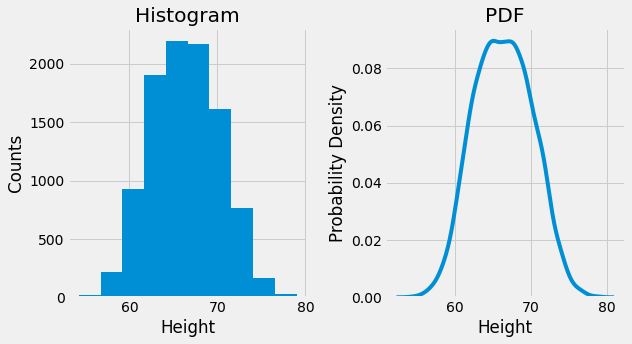

In [6]:
fig, ax = plt.subplots(ncols=2,figsize=(9,5))

df['Height'].hist(ax=ax[0])
ax[0].set(ylabel='Counts',xlabel='Height',title='Histogram')

sns.distplot(df['Height'],hist=False,ax=ax[1])
ax[1].set(ylabel='Probability Density',title='PDF')

plt.tight_layout()

#### Expected Value and Variance of PDFs

$$ E(X) = \mu = \int_{- \infty}^{+ \infty} p(x)x dx$$
$$ E((X-\mu)^2) = \sigma^2  = \int_{- \infty}^{+ \infty} p(x)(x-\mu)^2 dx$$



 The main takeaway here is that you simply can't use the same summation expression because $P(X=x_i) = 0$ for any $x_i$.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-probability-density-function-online-ds-ft-100719/master/images/pdf2.jpg">

The formal mathematical representation for calculating an area under the curve is given by:

$$ \large P(a \leq x \leq b) = \int_a^b f(x) dx \geq 0 $$

> To obtain a probability of observing a value in an interval $[a,b]$, you can use an integral (which gives you the area under the curve) from a to b using your PDF $f(x)$ 



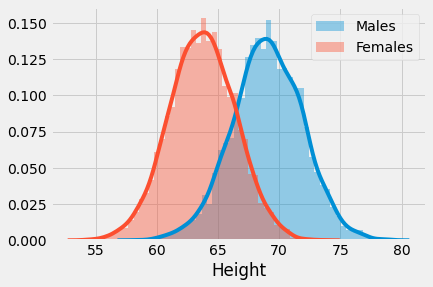

In [7]:
male_df = df.groupby('Gender').get_group('Male')
female_df = df.groupby('Gender').get_group('Female')
sns.distplot(male_df['Height'],label='Males')
sns.distplot(female_df['Height'],label='Females')
plt.legend()


#### Kernel Density Estimation 
- Non-parametric estimation to plot a curve at every individual data point (kernels)
- Added together to plot smooth density estimation ( most common kernel is Gaussian)
- Below example histogram and kde are from the same data
<img src="https://www.dropbox.com/s/vrgcphxmry5148l/Comparison_of_1D_histogram_and_KDE.png?raw=1" width=400>

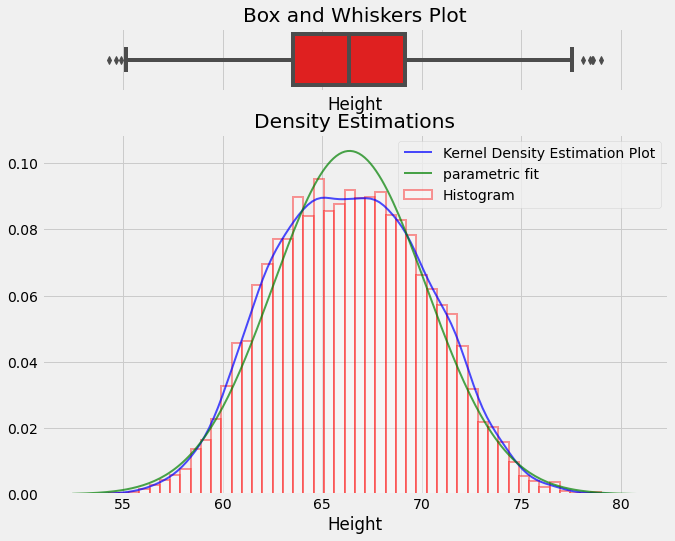

In [8]:
def kde_boxplot(x):
    import scipy.stats as stats
    # Create two vertical subplots sharing 15% and 85% of plot space
    # sharex allows sharing of axes i.e. building multiple plots on same axes
    fig, (ax, ax2) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios": (.15, .85)},
                                  figsize = (10,8) )
    sns.distplot(x, 
                hist=True, hist_kws={
                                    "linewidth": 2,
                                    "edgecolor" :'red',
                                    "alpha": 0.4, 
                                    "color":  "w",
                                    "label": "Histogram",
                                    },
                kde=True, kde_kws = {'linewidth': 2,
                                    'color': "blue",
                                    "alpha": 0.7,
                                    'label':'Kernel Density Estimation Plot'
                                    },
                fit= stats.norm, fit_kws = {'color' : 'green',
                                            'label' : 'parametric fit',
                                            "alpha": 0.7,
                                            'linewidth':2},
                ax=ax2)
    ax2.set_title('Density Estimations')

    sns.boxplot(x=x, ax = ax,color = 'red')

    ax.set_title('Box and Whiskers Plot')
    # ax2.set(ylim=(0, .08))
    # plt.ylim(0,0.11)
    plt.legend();

kde_boxplot(df['Height'])


#### Density Estimation and Plotting


**Kernel density estimation** or KDE is a common non-parametric estimation technique to plot a curve (the kernel) at every individual data point.

### Cumulative Distribution Function

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Cumulative_Distribution_Function_web.png">

$$\large F(x) = P(X \leq x)$$

 To calculate the $CDF(x)$ for any value of $x$, we compute the proportion of values in the distribution less than or equal to $x$ as follows:


> The Cumulative Distribution Function, CDF, gives the probability that the variable $X$ is less than or equal to a certain possible value $x$. 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-cumulative-distribution-function-online-ds-ft-100719/master/images/cdfs_dice_nyc_2.png">

# Types of Distributions

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-stat-distributions-use-cases-online-ds-ft-100719/master/images/dists.png" width=700>



## Distributions: Discrete vs Continuous 


- **Continuous vs Discrete Distributions & their probability functions**
<img src="https://www.dropbox.com/s/7qooiy76s3jvcr1/pmf_pdf.png?raw=1" width=400>
<img src="https://www.dropbox.com/s/ovrzewnefk2qc97/exp-var.png?raw=1" width=400>

- Discrete:
    - Binomial
    - Geometric
    - Poisson
- Continuous:
    - Uniform
    - Normal

## Distribution descriptions  in words
**_Binomial Distribution_**: "I flip a fair coin 5 times. What are the chances that I get heads 0 times? 1 time? 2 times? Etc..."

<!---
**_Negative Binomial Distribution_**: I flip a fair coin 5 times. What are the chances it takes me two flips to get heads twice? How about 3 flips to get heads twice? 4 Flips? Etc...--->

The **_Exponential Distribution_** describes the probability distribution of the amount of time it may take before an event occurs.  In a way, it solves the inverse of the problem solves by the Poisson Distribution.

The **_Poisson Distribution_** lets us ask how likely any given number of events are over a set interval of time.  
<!---
The **_Exponential Distribution_** lets us ask how likely the _length of an interval of time_ is before an event occurs exactly once. 

Another way to think of the Exponential Distribution is as the continuous analogue of the **_Geometric Distribution_**
--->

## Experiment  Vocab
- Experiments
- Trials: repeated event 
- Outcomes: whats happens each trial

## Discrete Distributions


### Bernoulli Trials and Binomial Distribution

#### Bernoulli Distribution/Trials
- Probability of $x$ successes in $n$ trials for Bernoulli/binomial variable (binary outcome)
    - Described by only one parameter $p$


- For binomial *trial*: 
$$Y = Bernoulli(p)$$ and $p=P(Y=1)=0.8$

### Binomial Distributions

**_Binomial Distribution_**: "I flip a fair coin 5 times. What are the chances that I get heads 0 times? 1 time? 2 times? Etc..."

- For binomial *distribution*, events are independent. 
$$ P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 

In [14]:
from math import factorial
def combination(n,k):
    combin = factorial(n)/(factorial(n-k)*factorial(k))
    return combin

def permutation(n,k):
    permut = factorial(n)/factorial(n-k)
    return permut


def binomial_P_k_success(n,k,p):
    """
    Calculates P(x=k) for a binomial distrubtions.
    
    Args:
        n (int): number total options
        k (int): number to select
        p (int): prob of success for binary outcome
    
    Returns:
        pk(float): prob that x=k
    """
    combs = combination(n,k)
    pk = combs*(p**k)*((1-p)**(n-k))
    return pk

In [16]:
# Flip a coin 10 times, what the chacnce of getting 7 heads?
binomial_P_k_success(7,4,0.5)

0.2734375

> **HOP OVER TO `distributions_notebook_app.ipynb`**

___

<!---### Geometric Distribution
- Geometric = Repeated trials, but examines the probability that the first success will occur on trial n.--->

### Poisson

- Represents the probability of $n$ events in a given time period when the rate of occurrence is constant


#### Poisson Probability Distribution: $$p(x) = \frac{\lambda^xe^{-\lambda}}{x!}$$

Also note that lambda $\lambda$ is the now the average number of successes that we anticipate in a given interval: the probability $p$ of success, times the number of intervals $n$.

In [17]:
def poisson_probability(lambd,x):
    res = (lambd**x)*(np.exp(-lambd)) / factorial(x)
    return res

Question 1
A fireman fights, on average, 4 fires per month. What is the probability that a fireman is called to two different fires this week?


In [18]:
lambd = 1/4

poisson_probability(lambd,2 )

0.024337524470981402

#### Uniform
- All outcomes are equally likely. 
- BOTH continuous AND discrete

## Exponential Distribution

The **_Exponential Distribution_** describes the probability distribution of the amount of time it may take before an event occurs.  In a way, it solves the inverse of the problem solves by the Poisson Distribution.


$$\lambda = \frac{1}{\mu}$$

Once we know the decay rate, we can use the **Probability Density Function** to tell us the exact point probability for any length $x$.

$$PDF(x) = \lambda e^{-\lambda x}$$

The **Probability Density Function** allows us to answer questions such as "What is the probability that it takes _exactly_ 4 minutes to ring up this customer?"

Since we are talking about a continuously-valued function, we'll also often want to make use of the **Cumulative Distribution Function**.  This allows us to answer questions such as "what is the probability that it will take less than 4 minutes to ring up this customer?"


$$CDF(x) = 1 - e^{-\lambda x}$$


In [19]:
import numpy as np

def exp_pdf(mu,x):
    decay_rate = 1/mu
    pdf= decay_rate*np.exp(-decay_rate*x)
    return pdf
    
    
def exp_cdf(mu,x):
    decay_rate = 1/mu
    return 1- np.exp(-decay_rate*x)

Steven is picking up a friend at the airport and their plane is late. The late flight is 22 minutes behind schedule. What is the probability that Steven will wait 30 minutes or less for his friend's flight to land?

In [20]:
exp_cdf(22,30)

0.7442708400868994


___

# Normal Distribution

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.** 
* area under curve is equal to 1.0
* denser in the center and less dense in the tails
* defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


<AxesSubplot:xlabel='Height'>

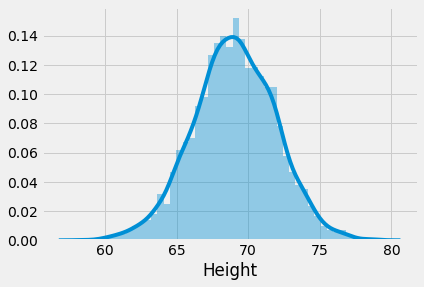

In [23]:
sns.distplot(male_df['Height'])

<AxesSubplot:>

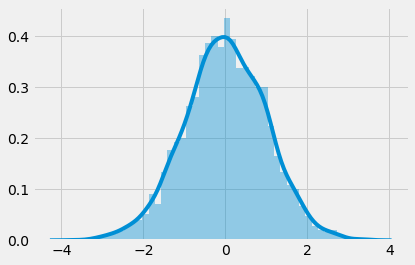

In [25]:
import scipy.stats as stats
y = stats.zscore(male_df['Height'])
sns.distplot(y)

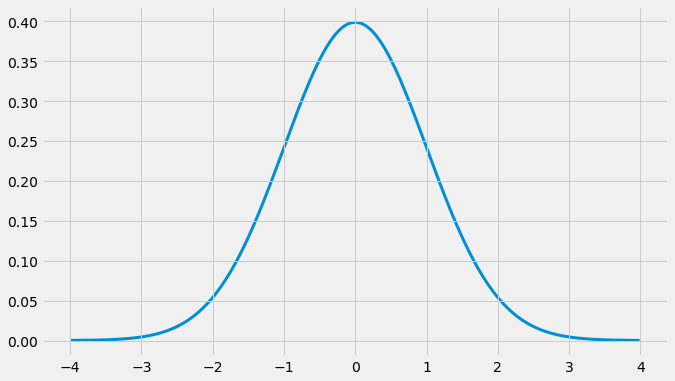

In [21]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

fig,ax = plt.subplots(figsize=(10,6),nrows=1)

ax.plot(x,y,zorder=-1,lw=3)

[(0.0, 1.0499637279578975), (-4.0, 3.9899999999998297)]

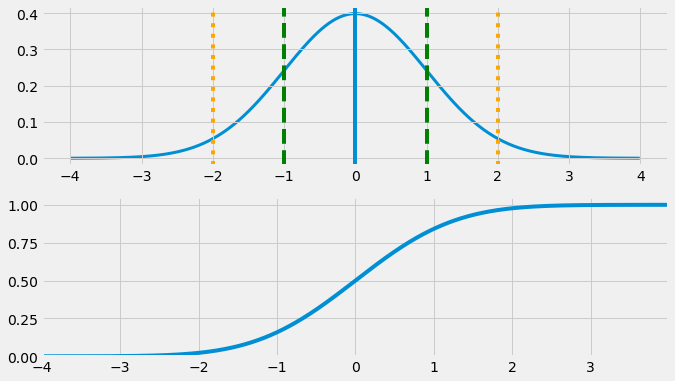

In [22]:

fig,axes = plt.subplots(figsize=(10,6),nrows=2)


ax =axes[0]
ax.plot(x,y,zorder=-1,lw=3)
# stats.norm.cdf(4)
ax.axvline(0)

ax.axvline(-1,ls='--',c='green')
ax.axvline(1,ls='--',c='green')

ax.axvline(-2,ls=':',c='orange')
ax.axvline(2,ls=':',c='orange')


ax=axes[1]
ax.plot(x, stats.norm.cdf(x))


ax.set(ylim=0,xlim=(x[0],x[-1]))
# fig

In [11]:
## Prove percentage rules - 
print(round(stats.norm.cdf(1) - stats.norm.cdf(-1),3))
round(stats.norm.cdf(2) - stats.norm.cdf(-2),3)

0.683


0.954

In [26]:
stats.norm.cdf([1,2])

array([0.84134475, 0.97724987])

## Standardized Normal Distribution

- Special case of the normal distribution where $\mu=0$ and $\sigma=1$

In [27]:
dfh = fs.datasets.load_height_weight()
dfh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Z-Scores

array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

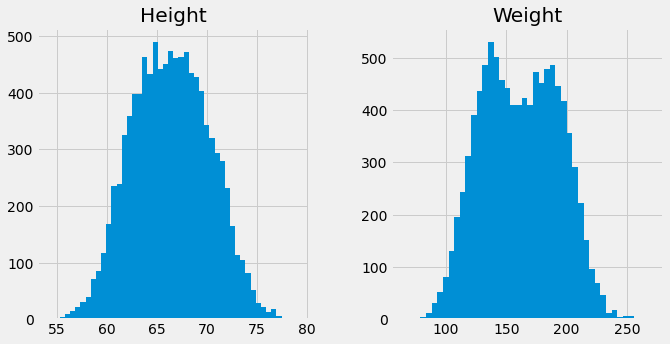

In [28]:
dfh.hist(bins='auto',figsize=(10,5))

#### Z-score

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\frac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation

In [29]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()
dfh['WeightZ'] = (dfh["Weight"] - dfh['Weight'].mean()) /dfh['Weight'].std()


array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'HeightZ'}>,
        <AxesSubplot:title={'center':'WeightZ'}>]], dtype=object)

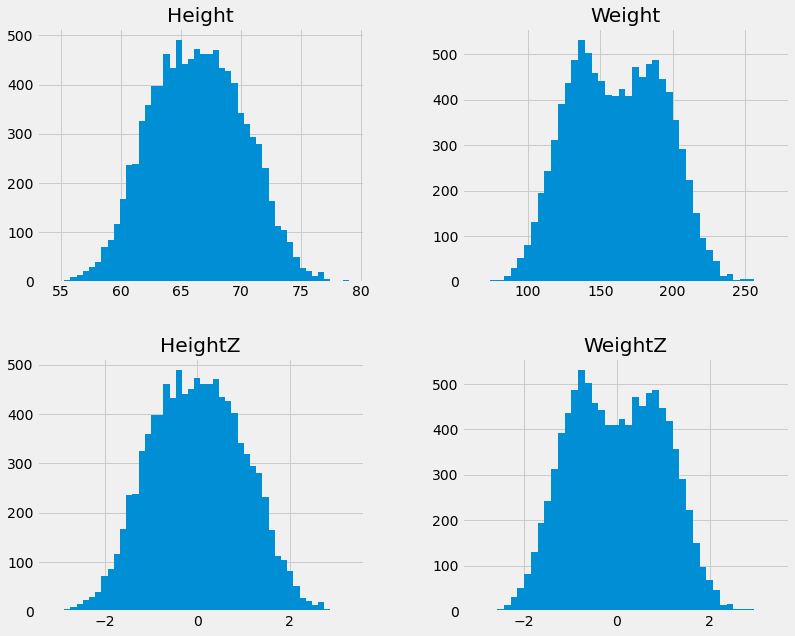

In [30]:
dfh.hist(figsize=(12,10),bins='auto')

## Z-Scoring does not affect the data distribution, just standardizes units

# Statistical Testing with Z-scores and p-values

- Once data is standardized, can start answering questions about population membership usint $Z$-Tests

### Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=40%>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.



## What Are Hypotheses ?

- Null Hypothesis: $H_0$ there is no relationship / the samples come from the same population.

- Alternative: $H_A$/$H_1$ there is a relationship / the samples DO NOT come from same distribution


 ### $\large \alpha$= 0.05


- What does it mean?
    - cutoff for judging whether our sample is "significantly" different than the population.
    - % chance that you would observe this sample from your population dataset





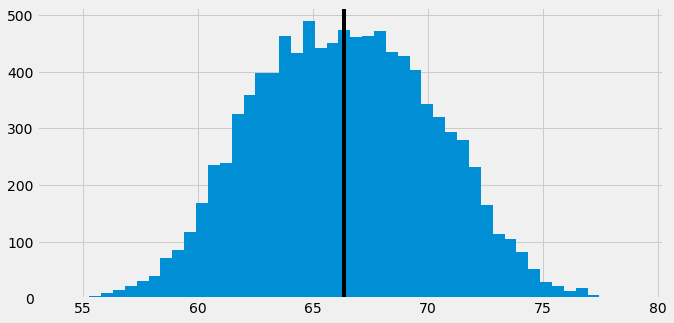

In [31]:
ax = dfh['Height'].hist(bins='auto',figsize=(10,5))
meanH = dfh['Height'].mean()
stdH = dfh["Height"].std()

ax.axvline(meanH,c='k')
fig =ax.get_figure()

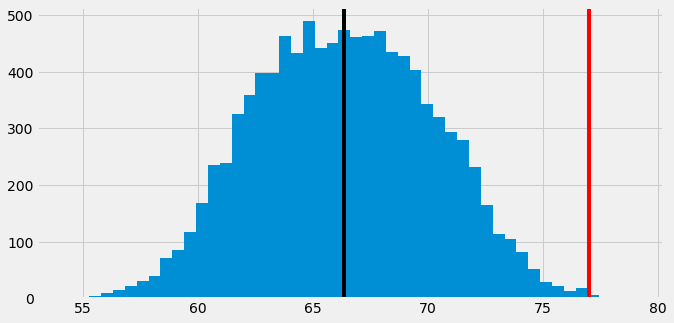

In [32]:
potential_alien_lifeform = 77#height
ax.axvline(potential_alien_lifeform,color='red')
fig

H0 =  The lifeform's height comes from the human population. 

H1 = The lifesform's height is significantly different than humans. (its from another population).

In [35]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()
z_alien = (potential_alien_lifeform - meanH) /stdH
z_alien

2.7634470526084107

### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

In [36]:
alpha=0.05
1 - stats.norm.cdf(z_alien)

0.0028597185423705485

# END OF 08/07 STUDY GROUP



| Set     | $H_0   $    | $H_a$ | Tails |
|---------|-------|-------|-------|
|<img width=30/>|<img width=100/>|<img width=100/>|<img width=50/>|
| 1  | $\mu= M $ |$\mu \neq M $ | 2  | 
| 2  | $\mu \geq M $ |$\mu < M $ | 1  | 
| 3  | $\mu \leq M $ |$\mu > M $ | 1  | 


## Distribution Characteristics


#### Skewness

- Symmetrical distribution: skewness = 0
- **Fisher-Pearson Coefficient of skewess:**

$$∑ N_{i=1} \frac{{(Yi−\bar{Y})}^3}{N} / {\sigma^3}$$

- Rules of thumb
    - Symmetrical-ish: -0.5 to +.05
    - Moderate Skew:
        - Negative skew: -1 to -0.5
        - Positive skew: +0.5 to +1
    - Highly skewed:
        - Less than -1
        - Greater than +1
    

<img src="https://www.dropbox.com/s/mqr3kux0caa64nk/skew1.jpeg?raw=1">



#### Kurtosis 




- Lengths of tails of distribution to describe extreme values (outliers)
- Univariate kurtosis:
$$\Sigma N_{i=1} \frac{{(Yi−\bar{Y})}^4}{N} / {\sigma^4}$$

- **Mesokurtic:**
    - Kurtosis similar to standard normal distribution
- **Leptokurtic (Kurtosis >3)**
    - Tails are fatter, peak is higher sharper
    - Data are heavy-tailed or many outliers
- **Platykurtic: (Kurtosis < 3)**
    - Shorter peak, tails are thinner than the normal distribution. 
    - Data are light-tailed or lack of outliers vs normal dist
<img src="https://www.dropbox.com/s/5ynsy7vkb196ilb/kurt2.jpg?raw=1" width=300>

# APPENDIX 

## Continuous Distributions


#### Normal Distribution


- Key characteristics of the normal distribution:
    * Normal distributions are symmetric around their mean.
    * mean = median = and mode of a normal 
    * area under curve is equal to 1.0
    * denser in the center and less dense in the tails
    * defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


* Around 68% of the area of a normal distribution is within _one standard deviation_ of the mean 
($(\mu-\sigma)$ to $(\mu + \sigma)$)
* Approximately 95% of the area of a normal distribution is within two standard deviations of the mean ($(\mu-2\sigma)$ to $(\mu + 2\sigma)$).



##### Normal Density Function
- Density of normal distribution for given value of x
- Can describe from its center and spread
$$y = \frac{1}{\sigma \sqrt{2}{2\pi}}e^{\frac{{(x -\mu)}{^2}}{2 \sigma ^{2}}}$$
- $\mu$ = mean
- $\sigma$ = standard deviation
- $\pi \approx 3.14159$
- $e \approx 2.71828$


In [ ]:
import numpy as np
import seaborn as sns

mu, sigma = 0.5, 0.1
n = 1000
s = np.random.normal(mu, sigma, n)
sns.distplot(s);

#### Standardized Normal Distribution


#### Z-score

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\dfrac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation



<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-standard-normal-distribution-online-ds-ft-100719/master/images/snorm.png" width=500></center>

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-standard-normal-distribution-online-ds-ft-100719/master/images/cdf_stnormal.png" width=500></center>

In [ ]:
import numpy as np
import seaborn as sns

fig,ax= plt.subplots(ncols=2, figsize=(10,4))
mean1, sd1 = 5, 3 # dist 1 
mean2, sd2 = 10, 2 # dist 2 
d1 = np.random.normal(mean1, sd1, 1000)
d2 = np.random.normal(mean2, sd2, 1000)

ax[0].set_title('Raw')
sns.distplot(d1,ax=ax[0]);
sns.distplot(d2,ax=ax[0]);

ax[1].set_title('Standardized')
sns.distplot([(x - d1.mean())/d1.std() for x in d1],ax=ax[1]);
sns.distplot([(x - d2.mean())/d2.std() for x in d2], ax=ax[1]);